In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from calendar import month_abbr

In [2]:
# Read the text file
with open("ether_against_time_05-04-2023_15_37_10.txt") as f:
    data_str = f.read()

In [3]:
# Convert the string to a list of lists
data = literal_eval(data_str)

In [4]:
# Preprocess data and create a DataFrame
rows = []
for item in data:
    date, scam_info = item[0]
    scam_id, scam_type = scam_info[0], scam_info[1]
    ether = item[1]
    rows.append([date, scam_id, scam_type, ether])

df = pd.DataFrame(rows, columns=['date', 'scam_id', 'scam_type', 'ether'])

In [5]:
df.sort_values(by='ether', ascending=False)

,date,scam_id,scam_type,ether
748,09/2018,5622,Scamming,1.534535e+22
1318,08/2017,2135,Phishing,6.583972e+21
1222,07/2017,90,Phishing,5.971610e+21
620,08/2017,2137,Phishing,3.389914e+21
1748,07/2017,2132,Scamming,2.428075e+21
...,...,...,...,...
635,03/2018,3151,Phishing,0.000000e+00
624,06/2018,2614,Phishing,0.000000e+00
554,11/2018,5735,Scamming,0.000000e+00
366,01/2019,5720,Scamming,0.000000e+00


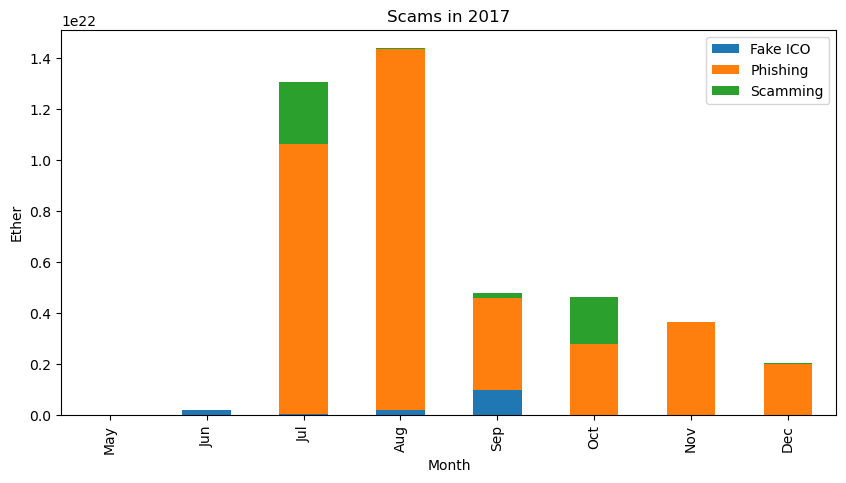

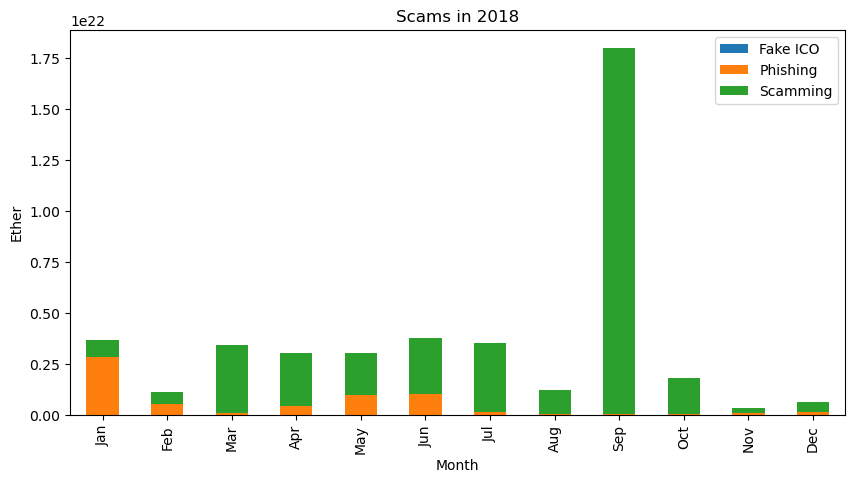

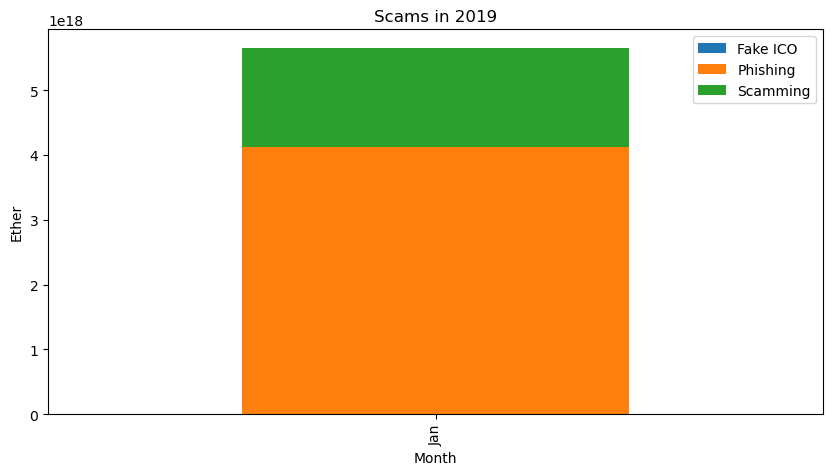

In [6]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a pivot table with year and month as index and scam_type as columns
pivot_table = df.pivot_table(index=['year', 'month'], columns='scam_type', values='ether', aggfunc='sum')

# Create a bar plot for each year with each bar labeled with corresponding scam type
for year in pivot_table.index.get_level_values('year').unique():
    data = pivot_table.loc[year]
    ax = data.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_title(f'Scams in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Ether')
    ax.legend(loc='upper right')
    # Set x-axis ticks and labels based on actual months present in the data for this year
    months = pivot_table.loc[year].index.get_level_values('month').unique()
    ax.set_xticks(range(len(months)))
    ax.set_xticklabels([month_abbr[i] for i in months])
    plt.show()